###
NAMA : FINA KHAIRUNNISA
NIM : 10220015
TOPIK : 1. Topic Modelling
        2. Exploratory Data Analysis
        3. Search Engine
DATASET : DisneylandReviews

TOPIC MODELLing

In [1]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.6 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039284 sha256=0ceb678f32216767b405e1b239ad00beb56f36ea2f86ded427358392dcc8911a
  Stored in di

In [2]:
!pip install bertopic[visualization]

In [3]:
#import packages

import pandas as pd
import numpy as np
from bertopic import BERTopic
import string

In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('./drive/MyDrive/NLP/DisneylandReviews.csv', encoding='latin-1')

In [9]:
df.head(10)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong
9,670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong


In [10]:
def clean_text(text):
  delete_dict ={sp_character: '' for sp_character in string.punctuation}
  delete_dict[' '] = ' '
  table = str.maketrans(delete_dict)
  text1 = text.translate(table)
  textArr = text1.split()
  text2 = ' '.join([w for w in textArr if (not w.isdigit() and (not w.isdigit() and len(w)>3))])

  return text2.lower()

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
df.dropna(axis = 0, how = 'any', inplace=True)

In [13]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [15]:
df['Review_Text'] = df['Review_Text'].apply(clean_text)

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [18]:
def remove_stopwords(text):
  textArr = text.split(' ')
  rem_text = " ".join([i for i in textArr if i not in stop_words])
  return rem_text
  df['Review_Text'] = df['Review_Text'].apply(remove_stopwords)

In [19]:
df['Review_Text'].head()

0    youve ever been disneyland anywhere youll find...
1    been while since last time visit disneyland th...
2    thanks wasn humid when visiting park otherwise...
3    disneyland great compact park unfortunately th...
4    location city took around hour from kowlon kid...
Name: Review_Text, dtype: object

In [21]:
model = BERTopic(verbose=True)

docs = df.Review_Text.to_list()
topics, probabilities = model.fit_transform(docs)

2024-01-23 22:30:17,435 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/1333 [00:00<?, ?it/s]

2024-01-23 23:06:44,743 - BERTopic - Embedding - Completed ✓
2024-01-23 23:06:44,745 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-23 23:08:08,562 - BERTopic - Dimensionality - Completed ✓
2024-01-23 23:08:08,566 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-23 23:08:17,396 - BERTopic - Cluster - Completed ✓
2024-01-23 23:08:17,418 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-23 23:08:22,981 - BERTopic - Representation - Completed ✓


In [22]:
model.get_topic_freq().head(11)

,Topic,Count
1,-1,27202
0,0,3994
18,1,2871
3,2,670
5,3,509
10,4,347
49,5,319
36,6,282
35,7,273
4,8,261


In [23]:
model.get_topic(0)

[('hong', 0.020026492791351255),
 ('kong', 0.019733750795372332),
 ('disneyland', 0.008184794121256101),
 ('smaller', 0.0078098526941148445),
 ('disney', 0.007765995551707783),
 ('florida', 0.0077129940795622395),
 ('world', 0.006850439992589277),
 ('small', 0.006298268227411013),
 ('than', 0.00613844062034506),
 ('park', 0.005604254958492868)]

In [24]:
model.get_topic(1)

[('paris', 0.01296398719690067),
 ('hotel', 0.005760265728128024),
 ('disney', 0.005560959411064261),
 ('which', 0.0054453646715389515),
 ('were', 0.00521062112064985),
 ('with', 0.005055724673452927),
 ('have', 0.0049879972665378015),
 ('this', 0.004985845910568163),
 ('from', 0.004979698610369896),
 ('park', 0.0048625534757740325)]

In [25]:
model.visualize_topics()

In [26]:
model.visualize_barchart()

In [27]:
model = BERTopic(nr_topics=20)

In [28]:
topics, probabilities = model.fit_transform(docs)

In [29]:
model.visualize_barchart()

2. EDA

In [30]:
#Standard importing library: pandas, numpy, matplotlib dan seaborn (plotting)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler #Library umum untuk machine learning
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
df = pd.read_csv('./drive/MyDrive/NLP/DisneylandReviews.csv', encoding='latin-1')

In [32]:
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [33]:
df.head(10)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong
9,670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong


In [34]:
df['Rating'].describe()

count    42656.000000
mean         4.217695
std          1.063371
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

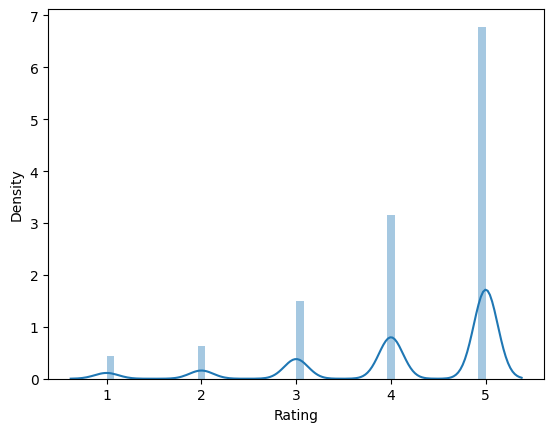

In [35]:
sns.distplot(df['Rating']);

In [37]:
print("Skewness: %f" % df['Rating'].skew())
print("Kurtosis: %f" % df['Rating'].kurt())

Skewness: -1.392020
Kurtosis: 1.255343


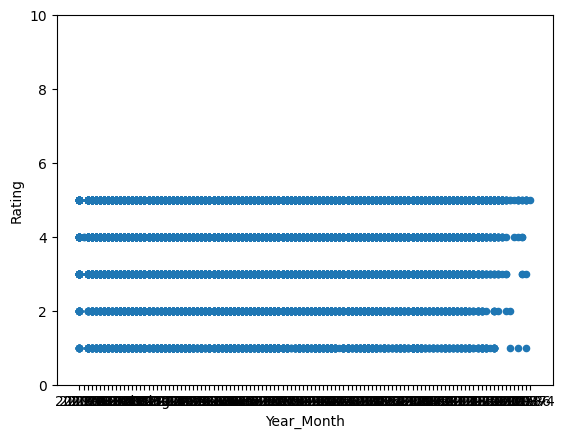

In [42]:
var = 'Year_Month'
data = pd.concat([df['Rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='Rating', ylim=(0,10));

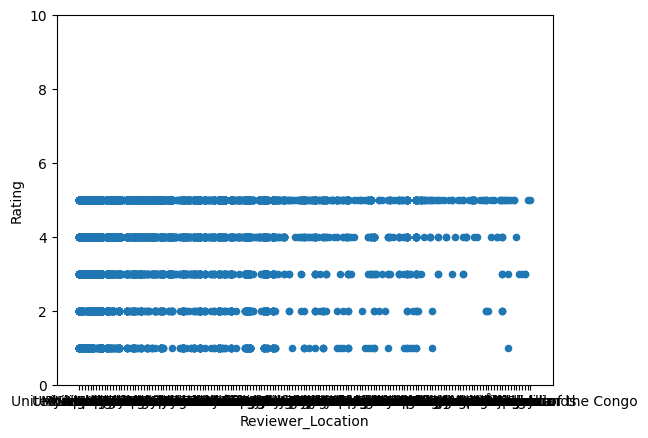

In [44]:
var = 'Reviewer_Location'
data = pd.concat([df['Rating'], df[var]], axis=1)
data.plot.scatter(x=var, y='Rating', ylim=(0,10));

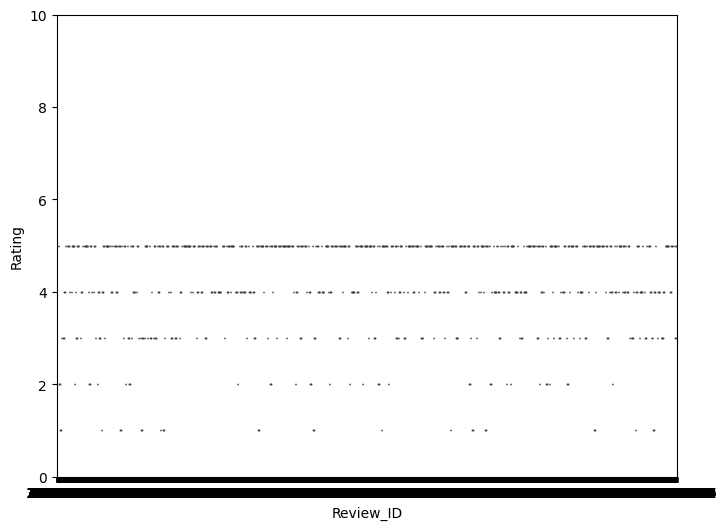

In [45]:
var = 'Review_ID'
data = pd.concat([df['Rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Rating", data=data)
fig.axis(ymin=0, ymax=10);

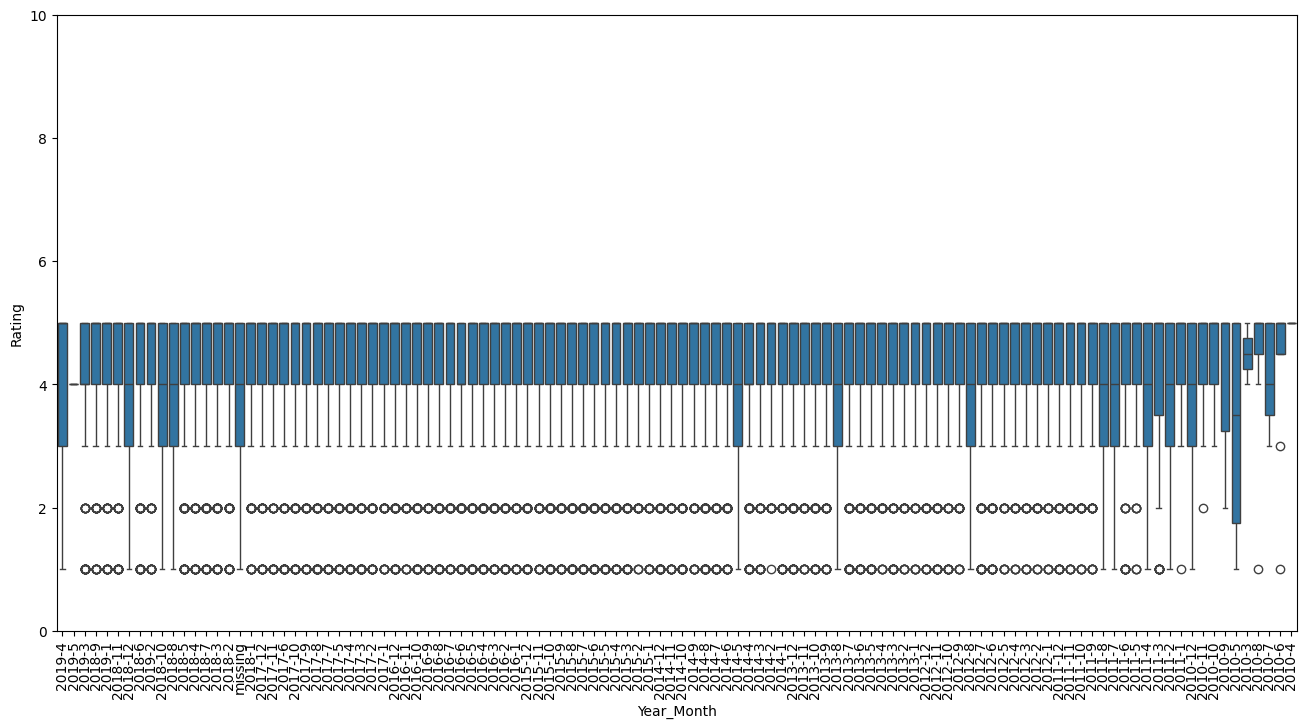

In [47]:
var = 'Year_Month'
data = pd.concat([df['Rating'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Rating", data=data)
fig.axis(ymin=0, ymax=10);
plt.xticks(rotation=90);

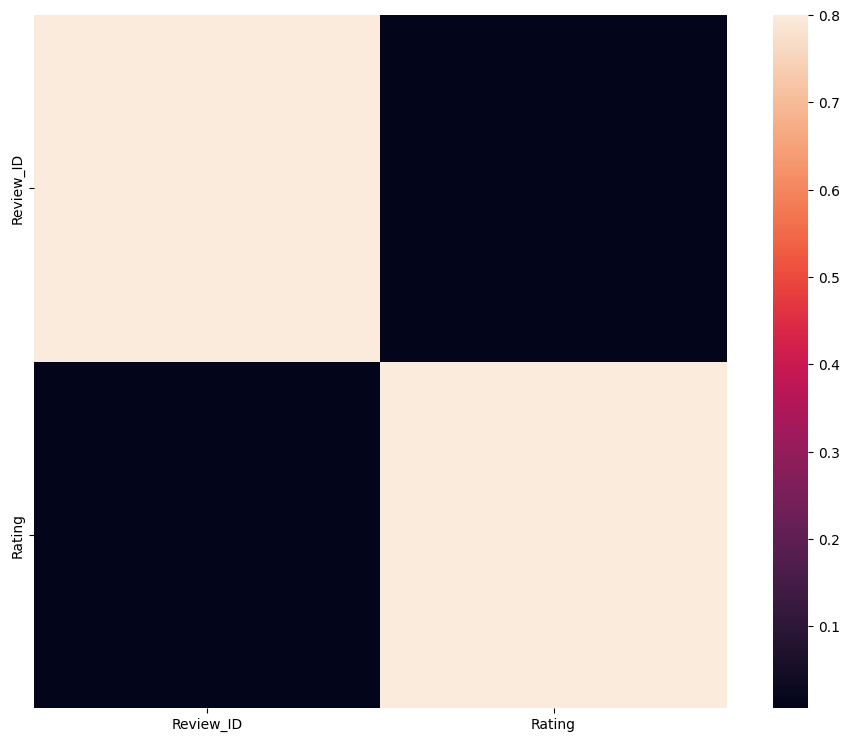

In [48]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

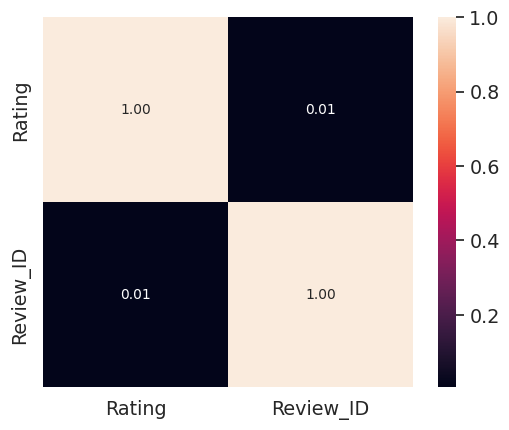

In [49]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Rating')['Rating'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

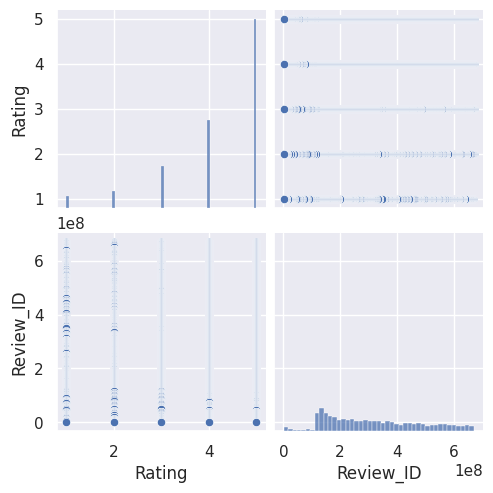

In [50]:
#scatterplot yang lengkap 	Rating
sns.set()
cols = ['Rating', 'Review_ID', 'Year_Month']
sns.pairplot(df[cols], size = 2.5)
plt.show();


 Search Engine

In [58]:
# import library termasuk spacy, gensim, re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

In [59]:
df = pd.read_csv('./drive/MyDrive/NLP/DisneylandReviews.csv', encoding='latin-1')

In [60]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.",Disneyland_HongKong
3,670607911,4,2019-4,Australia,"HK Disneyland is a great compact park. Unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) If you go midweek, it is not too crowded and certainly no where near as bus as LA Disneyland. We did notice on this visit that prices for food, drinks etc have really gone through the roof so be prepared to pay top dollar for snacks (and avoid the souvenir shops if you can) Regardless, kids will love it.",Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1 hour from Kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in Hong Kong",Disneyland_HongKong


In [61]:
#Kita preprocessing datanya:
# Membuang stop_words
#Membuang punctuation
#Membuang tanda2
#Membuang kata yang mengandung angka

#Tokenisasi: Memecah2 kata
#Lematisasi: Dibuat kata dasar
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):

    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)

    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]

    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    #return tokens
    return tokens

In [62]:
#Menjalankan fungsi pembersihan, tokenisasi dan lematisasi lalu hasilnya diletakan di kolom baru
print ('Cleaning and Tokenizing...')
%time df['tokenized'] = df['Review_Text'].map(lambda x: spacy_tokenizer(x))

df.head()

Cleaning and Tokenizing...
CPU times: user 21min 36s, sys: 3.26 s, total: 21min 39s
Wall time: 21min 54s


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,tokenized
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,Disneyland_HongKong,"[disneyland, find, disneyland, hong, kong, similar, layout, walk, main, street, familiar, feel, ride, small, world, absolutely, fabulous, worth, day, visit, fairly, hot, relatively, busy, queue, fairly]"
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",Disneyland_HongKong,"[time, visit, disneyland, time, stay, tomorrowland, aka, marvel, land, iron, man, experience, newly, open, ant, man, wasp, ironman, great, feature, exciting, especially, scenery, central, area, kowloon, antman, change, previous, buzz, lightyear, expect, boy, like, space, mountain, turn, star, wars, great, cast, member, staff, felt, bit, minus, point, dun, feel, like, disney, brand, local, like, ocean, park, worst, smiling, face, wanna, enter, attraction, leave, hello, suppose, happiest, place, earth, brand, feel, bakery, main, street, attractive, delicacy, disney, theme, sweet, good, point, starbuck, inside, theme, park]"
2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.",Disneyland_HongKong,"[thanks, god, wasn, hot, humid, visit, park, big, issue, lot, shade, arrive, leave, unfortunately, didn, evening, parade, hour, plenty, find, interesting, enjoy, wasn, extremely, busy, long, time, queue, certain, attraction, minute, bad, amazing, time, feel, bit, underwhelmed, choice, ride, attraction, park, small, expect, grand, main, castle, close, way, small, food, option, good, coffee, shop, include, starbucks, plenty, gift, shop, issue, toilet, great, day, enjoy]"
3,670607911,4,2019-4,Australia,"HK Disneyland is a great compact park. Unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) If y

In [63]:
#kita intip hasil tokenisasinya
plot = df['tokenized']
plot[0:5]

0                                                                                                                                                                                                                                                                                                                                                                                                                                              [disneyland, find, disneyland, hong, kong, similar, layout, walk, main, street, familiar, feel, ride, small, world, absolutely, fabulous, worth, day, visit, fairly, hot, relatively, busy, queue, fairly]
1    [time, visit, disneyland, time, stay, tomorrowland, aka, marvel, land, iron, man, experience, newly, open, ant, man, wasp, ironman, great, feature, exciting, especially, scenery, central, area, kowloon, antman, change, previous, buzz, lightyear, expect, boy, like, space, mountain, turn, star, wars, great, cast, member, staff, felt, bit, minus, point, dun, fee

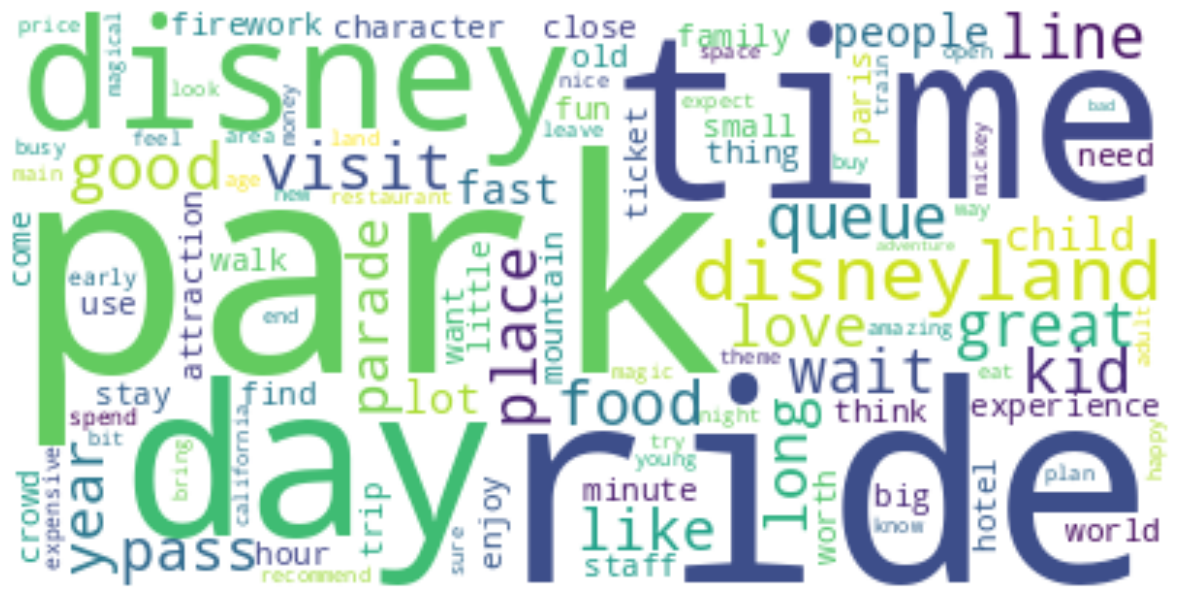

In [64]:
# Membuat wordcloud untuk memunculkan kata-kata yang paling sering muncul
#Makin sering muncul satu kata, makin besar hurufnya
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
#Salah satu bagian penting untuk membuat search engine, kata-kata nya harus diletakan di "kamus"
#Untuk membuat kamus atau dictionary kita perlu gensim
from gensim import corpora

#creating term dictionary
%time dictionary = corpora.Dictionary(plot)

#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#NOTE: Since we have smaller dataset, we will keep this commented for now.

#dictionary.filter_extremes(no_below=4, no_above=0.2)

#list of few which which can be further removed
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

CPU times: user 3.87 s, sys: 8.76 ms, total: 3.88 s
Wall time: 6.25 s


In [66]:
#print kamusnya
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['absolutely', 0], ['busy', 1], ['day', 2], ['disneyland', 3], ['fabulous', 4], ['fairly', 5], ['familiar', 6], ['feel', 7], ['find', 8], ['hong', 9], ['hot', 10], ['kong', 11], ['layout', 12], ['main', 13], ['queue', 14], ['relatively', 15], ['ride', 16], ['similar', 17], ['small', 18], ['street', 19], ['visit', 20], ['walk', 21], ['world', 22], ['worth', 23], ['aka', 24], ['ant', 25], ['antman', 26], ['area', 27], ['attraction', 28], ['attractive', 29], ['bakery', 30], ['bit', 31], ['boy', 32], ['brand', 33], ['buzz', 34], ['cast', 35], ['central', 36], ['change', 37], ['delicacy', 38], ['disney', 39], ['dun', 40], ['earth', 41], ['enter', 42], ['especially', 43], ['exciting', 44], ['expect', 45], ['experience', 46], ['face', 47], ['feature', 48], ['felt', 49], ['good', 50]]]


In [68]:
#print kamusnya sekaligus menghitung berapa jumlah kata-kata tersebut muncul di dokumen nya
corpus = [dictionary.doc2bow(desc) for desc in plot]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('absolutely', 1), ('busy', 1), ('day', 1), ('disneyland', 2), ('fabulous', 1), ('fairly', 2), ('familiar', 1), ('feel', 1), ('find', 1), ('hong', 1), ('hot', 1), ('kong', 1), ('layout', 1), ('main', 1), ('queue', 1), ('relatively', 1), ('ride', 1), ('similar', 1), ('small', 1), ('street', 1), ('visit', 1), ('walk', 1), ('world', 1), ('worth', 1)], [('disneyland', 1), ('feel', 2), ('main', 1), ('street', 1), ('visit', 1), ('aka', 1), ('ant', 1), ('antman', 1), ('area', 1), ('attraction', 1), ('attractive', 1), ('bakery', 1), ('bit', 1), ('boy', 1), ('brand', 2), ('buzz', 1), ('cast', 1), ('central', 1), ('change', 1), ('delicacy', 1), ('disney', 2), ('dun', 1), ('earth', 1), ('enter', 1), ('especially', 1), ('exciting', 1), ('expect', 1), ('experience', 1), ('face', 1), ('feature', 1), ('felt', 1), ('good', 1), ('great', 2), ('happiest', 1), ('hello', 1), ('inside', 1), ('iron', 1), ('ironman', 1), ('kowloon', 1), ('land', 1), ('leave', 1), ('lightyear', 1), ('like', 3), ('local', 1)

In [69]:
#Codingan2 dibawah adalah inti dari pembuatan search engine dengan metode TF-IDF
%time movie_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time movie_lsi_model = gensim.models.LsiModel(movie_tfidf_model[corpus], id2word=dictionary, num_topics=300)

CPU times: user 551 ms, sys: 1.96 ms, total: 553 ms
Wall time: 565 ms
CPU times: user 55.6 s, sys: 9.88 s, total: 1min 5s
Wall time: 45.7 s


In [71]:
%time gensim.corpora.MmCorpus.serialize('movie_tfidf_model_mm', movie_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('movie_lsi_model_mm',movie_lsi_model[movie_tfidf_model[corpus]])


CPU times: user 6.79 s, sys: 211 ms, total: 7 s
Wall time: 7.06 s
CPU times: user 37.7 s, sys: 1.38 s, total: 39 s
Wall time: 40.9 s


In [72]:
#Load the indexed corpus
movie_tfidf_corpus = gensim.corpora.MmCorpus('movie_tfidf_model_mm')
movie_lsi_corpus = gensim.corpora.MmCorpus('movie_lsi_model_mm')

print(movie_tfidf_corpus)
print(movie_lsi_corpus)

MmCorpus(42656 documents, 32918 features, 1769150 non-zero entries)
MmCorpus(42656 documents, 300 features, 12796799 non-zero entries)


In [73]:
#Inti dari algoritmanya adalah mencari kata-kata yang mirip -> similar, index similarity nya tinggi
from gensim.similarities import MatrixSimilarity

%time movie_index = MatrixSimilarity(movie_lsi_corpus, num_features = movie_lsi_corpus.num_terms)


CPU times: user 17.7 s, sys: 302 ms, total: 18 s
Wall time: 19 s


In [74]:
# Setelah kita bangun search engin nya. Codingan ini berfungsi untuk Query nya. Yaitu menampilkan judul movie yang cocok sesuai dengan Querynya
from operator import itemgetter

def search_similar_movies(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = movie_tfidf_model[query_bow]
    query_lsi = movie_lsi_model[query_tfidf]

    movie_index.num_best = 5

    movies_list = movie_index[query_lsi]

    movies_list.sort(key=itemgetter(1), reverse=True)
    movie_names = []

    for j, movie in enumerate(movies_list):

        movie_names.append (
            {
                'Relevance': round((movie[1] * 100),2),
                'Location': df['Reviewer_Location'][movie[0]],
                'Plot': df['Review_Text'][movie[0]]
            }

        )
        if j == (movie_index.num_best-1):
            break

    return pd.DataFrame(movie_names, columns=['Relevance','Location','Plot'])



In [76]:
# Saya ingin mencari komentar terkait love
search_similar_movies('love')


,Relevance,Location,Plot
0,90.13,United States,It is Disneyland... what is not to love??? I wouldn't trust ANYONE who doesn't love Disneyland!
1,88.00,United States,Loved the exhibit in Great Moments with Lincoln. Love fastpasses.
2,87.95,United States,We always have the best time here!! Laughing all day!!! Love it!!! Love it!!!
3,77.56,United States,"I went when I was a kid, and loved it! I've been the Disney World also, and love it too!"
4,77.31,United Kingdom,"Love, loved loved it!!!! So want to go back, took all tips off this site and we had an amazing five days, canny wait to go back,."
